<a href="https://colab.research.google.com/github/celina-velazquez/ADS-504/blob/main/Assignment_Guide_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# All required IMPORTS!

#!pip uninstall scikit-learn -y
#!pip install scikit-learn


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from io import BytesIO
from zipfile import ZipFile
from time import time
import sklearn
from skimage import io
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib.image import imread
import glob

import warnings

warnings.filterwarnings('ignore')

# Cat Faces:

Get the cat-faces dataset from: https://github.com/fferlito/Cat-faces-dataset
Load all the images in the first zip file. Use scikit-image (https://scikit-image.org/) to load the
images and convert them to grayscale (rgb2gray).
Adapt the code from the following website to work with the cat faces:
https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

In [3]:
# First you need to download dataset-part1.tar from the link above then uplaod it here.
import urllib.request
# Create the folder called "output_folder" where I want to store the file and unzip the files there.
!mkdir "/content/output_folder"

#Change directory to the new folder I created
import os
os.chdir("/content/output_folder")

# Download tar.gz file in the folder I created
urllib.request.urlretrieve('https://github.com/fferlito/Cat-faces-dataset/raw/master/dataset-part1.tar.gz', 'dataset-part1.tar.gz')

#Check the current working directory
!pwd


/content/output_folder


In [4]:
# Check contents of the new folder
#!ls /content/output_folder

# Unzip the file in the output_folder
!tar -xvf "/content/output_folder/dataset-part1.tar.gz" -C "/content/output_folder"     #[run this cell to extract tar files]

Streaming output truncated to the last 5000 lines.
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_5049.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_1411.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_2397.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_2223.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_2892.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_7455.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_1741.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_9189.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_7802.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflags'
dataset-part1/cat_5493.png
tar: Ignoring unknown extended header keyword 'SCHILY.fflag

In [ ]:
# OR you can use the following for tar.gz

##!tar -xzvf "/content/drive/MyDrive/Machine_Learning/Assignment6/dataset-part1.tar.gz" -C "/content/drive/MyDrive/Machine_Learning/Assignment5/"     #[run this cell to extract tar.gz files]

In [5]:
path = "/content/output_folder/dataset-part1"

# save all of the file names to a list and
# then loop through this list reading your images (numpy arrays) into a new list

print("\nRetrieving cats images from:")
print(path)

folders = glob.glob(path)
i = 0
cat_col = []

for folder in folders:
    for f in glob.glob(folder+'/*.png'):
        i = i +1
        cat_col.append(f)

print("\nCat images found: " + str(i))


Retrieving cats images from:
/content/output_folder/dataset-part1

Cat images found: 10000


# Grayscale image

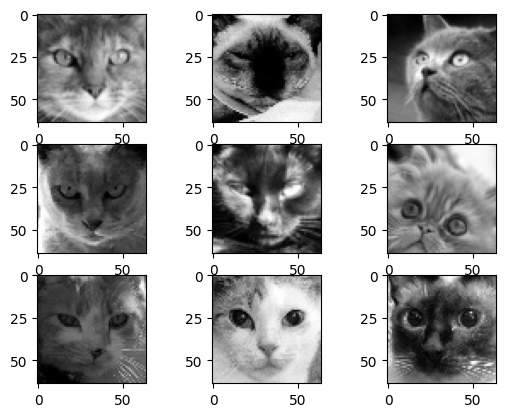

In [6]:
import cv2

fig, ax = plt.subplots(nrows=3, ncols=3)
axes = ax.flatten()


for i in range(9):
    path=cat_col[i]
    img = cv2.imread(path)
    axes[i].imshow(rgb2gray(img), cmap=plt.cm.gray)

plt.show()

In [7]:
# Set the array in gray
cat_col_num = []

for i in range(0,10000):
  cat_col_num.append(rgb2gray(imread(cat_col[i])))

cat_col_num = np.array(cat_col_num) # Convert to numpy array

print(cat_col_num.shape)

(10000, 64, 64)


In [8]:
cat_col_num = np.array(cat_col_num)
cat_resh = cat_col_num.reshape(cat_col_num.shape[0], cat_col_num.shape[1] * cat_col_num.shape[1])

cat_centered = cat_resh - cat_resh.mean(axis=0)
cat_centered -= cat_centered.mean(axis=1).reshape(cat_col_num.shape[0], -1)

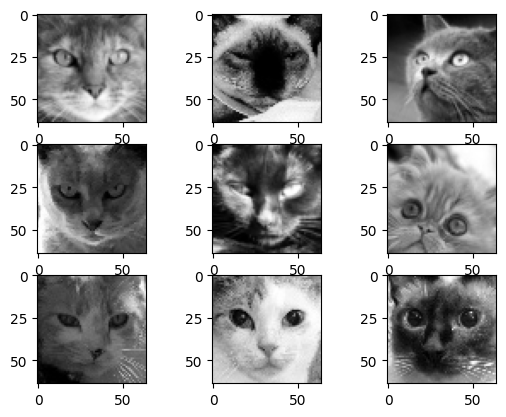

In [9]:
# Plot similar to the previous plot
fig, ax = plt.subplots(nrows=3, ncols=3)
axes = ax.flatten()


for i in range(9):
    img = cat_col_num[i]
    axes[i].imshow(img, cmap=plt.cm.gray)

plt.show()

Center Mean at 0

Next, you will work on selecting the number of components. You may have seen a plot before using
the eigenvalues. Recreate this plot for the cat dataset: you can get them from the PCA model
object. However, you have another method to select the number of components, now that you can
use cross-validation.
Look at this example from the scikit-learn documentation to see how to
use cross-validation with PCA. Then, using the cat faces dataset, make a plot of reconstruction error for PCA using sklearn. https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html

In [17]:
# It may take time for a few hours! :)
# Be patient!


cv_scores = []
for i in range(0, 21):
    # Apply "full" PCA here:
    pca = PCA(svd_solver="full", n_components=i)
    print('n_components = %d' % i)
    # create cv_scores applying cross_val_score with the data and pca mean value:
    cv_scores.append(np.mean(cross_val_score(pca, cat_centered)))
    ## You can consider n_jobs=2
    #cv_scores.append(...)

n_components = 0
n_components = 1
n_components = 2
n_components = 3
n_components = 4
n_components = 5
n_components = 6
n_components = 7
n_components = 8
n_components = 9
n_components = 10
n_components = 11
n_components = 12
n_components = 13
n_components = 14
n_components = 15
n_components = 16
n_components = 17
n_components = 18
n_components = 19
n_components = 20


In [19]:
# Add the last component and fit the pca here:
pca.fit(cat_centered)

PCA(n_components=20, svd_solver='full')

In [24]:
# Form the reconstruction Error here:
n_components_range = range(1, 21)
reconstruction_errors = []
explained_var_ratios = []

for i in n_components_range:
    pca = PCA(svd_solver="full", n_components=i)
    X_proj = pca.fit_transform(cat_centered)
    X_reconstructed = pca.inverse_transform(X_proj)
    # Reconstruction error (mean squared error)
    rec_error = np.mean((cat_centered - X_reconstructed) ** 2)
    reconstruction_errors.append(rec_error)
    # Cumulative explained variance ratio
    expl_var_ratio = np.sum(pca.explained_variance_ratio_)
    explained_var_ratios.append(expl_var_ratio)

rec_error_df = pd.DataFrame({
    'n_components': list(n_components_range),
    'reconst error': reconstruction_errors,
    'explained var ratio': explained_var_ratios})

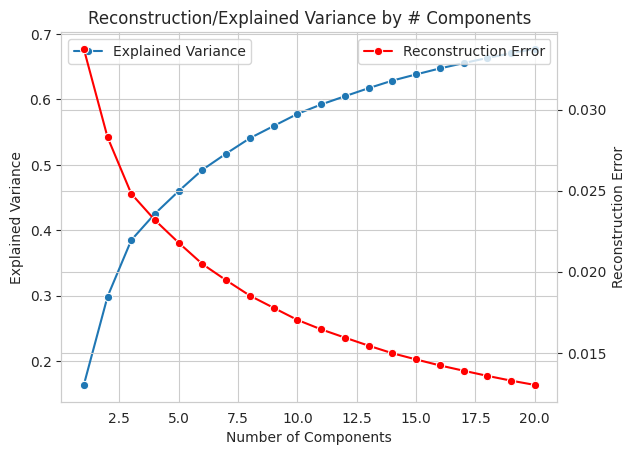

In [25]:
# Plot it here:

fig, ax = plt.subplots()
# Plot Cumulative Explained Variance on primary y-axis
sns.lineplot(
    x=rec_error_df['n_components'],
    y=rec_error_df['explained var ratio'],
    marker='o', ax=ax, label='Explained Variance'
)

# Create twin axes sharing the same x-axis for reconstruction error
ax2 = ax.twinx()

# Plot Reconstruction Error on secondary y-axis
sns.lineplot(
    x=rec_error_df['n_components'],
    y=rec_error_df['reconst error'],
    marker='o', color='r', ax=ax2, label='Reconstruction Error'
)

plt.title('Reconstruction/Explained Variance by # Components')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Explained Variance')
ax2.set_ylabel('Reconstruction Error')
plt.show()

PCA Inverse Transform 20 components

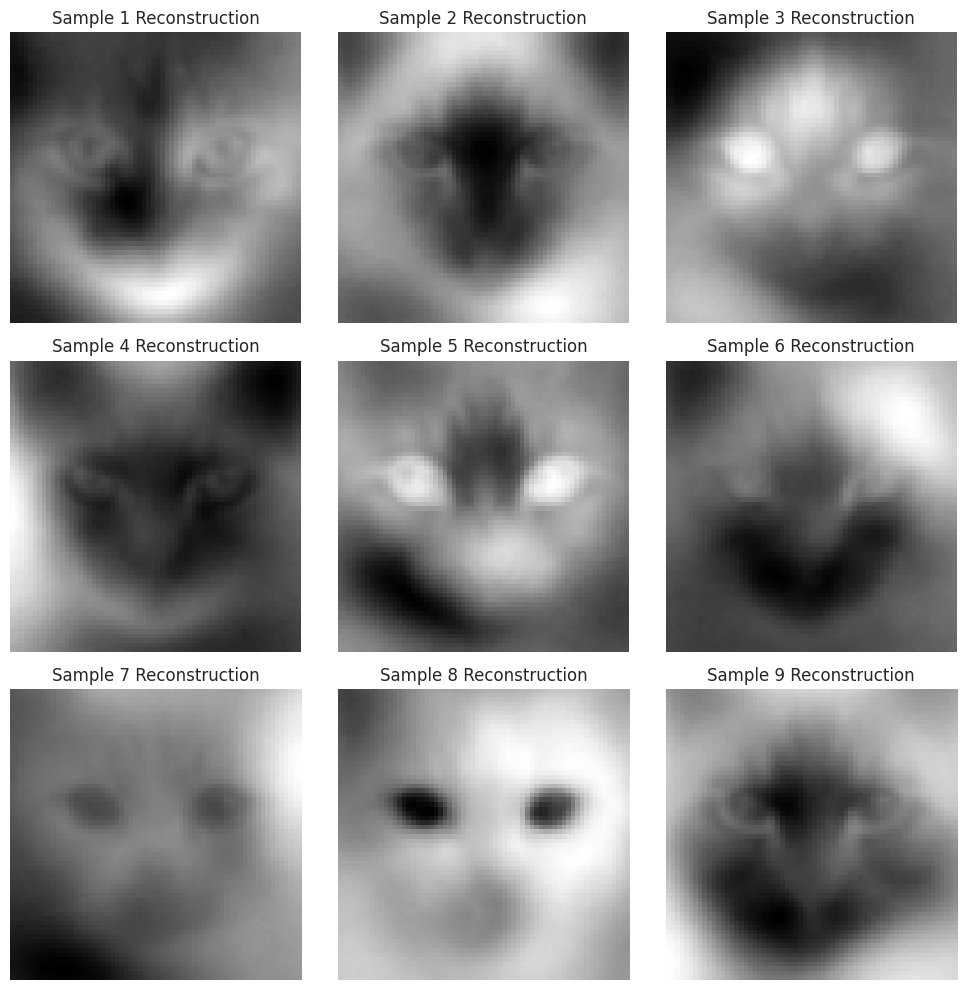

In [29]:
# Transform, inverse and then plot it here:
img_height, img_width = 64, 64

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    # Reshape the flattened vector back into the original image shape
    img = X_reconstructed[i].reshape(img_height, img_width)
    axes[i].imshow(img, cmap=plt.cm.gray)
    axes[i].axis('off')
    axes[i].set_title(f'Sample {i+1} Reconstruction')

plt.tight_layout()
plt.show()

Plot by 20 Principal Components

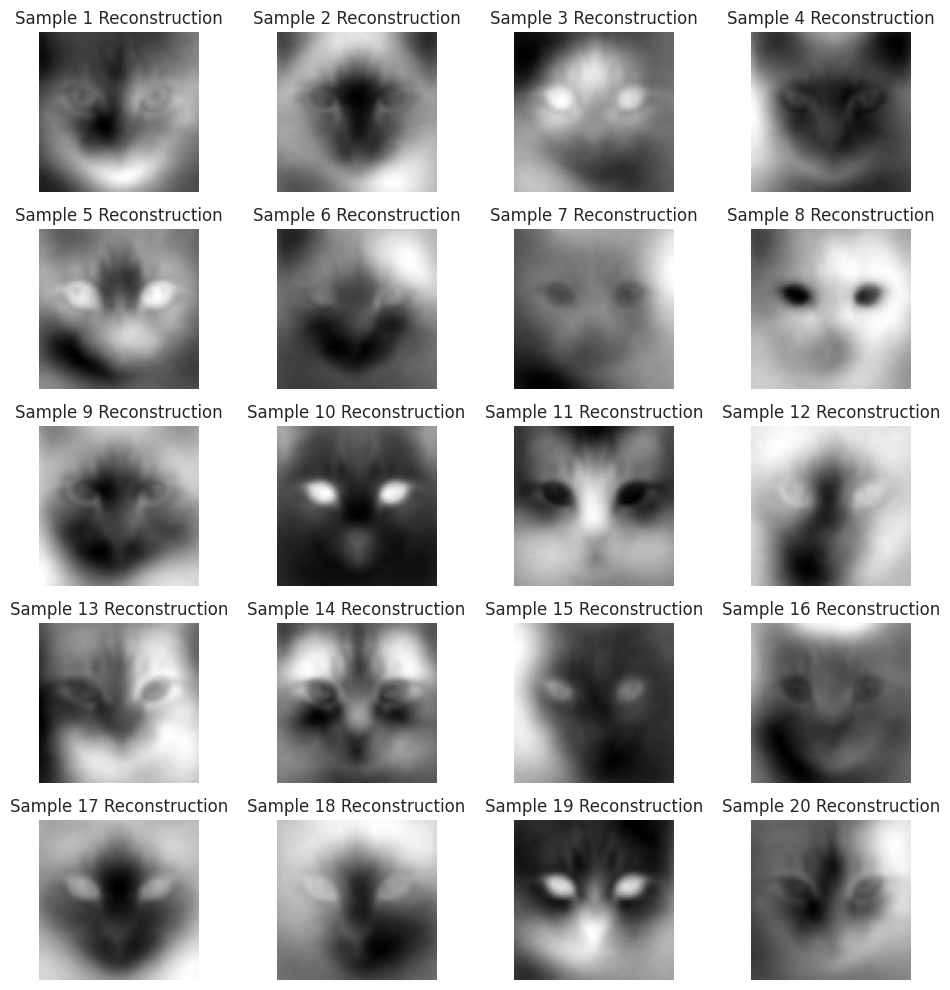

In [31]:
# Transform, inverse and then plot it here:
img_height, img_width = 64, 64

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))
axes = axes.flatten()

for i in range(20):
    # Reshape the flattened vector back into the original image shape
    img = X_reconstructed[i].reshape(img_height, img_width)
    axes[i].imshow(img, cmap=plt.cm.gray)
    axes[i].axis('off')
    axes[i].set_title(f'Sample {i+1} Reconstruction')

plt.tight_layout()
plt.show()

# **2 Clothing Reviews with Unsupervised Learning**

Next, you will revisit our clothing reviews dataset. Load the JSON data from modcloth as you did in assignment module 3.






In [2]:
from google.colab import files
import pandas as pd
import io

# Upload the JSON Lines file
uploaded = files.upload()

# Get the uploaded filename
filename = list(uploaded.keys())[0]

# Load the JSON Lines data into a DataFrame using pyarrow engine for speed
df = pd.read_json(io.BytesIO(uploaded[filename]), lines=True, engine='pyarrow')

# Display the DataFrame
print(df.head())

Saving modcloth_final_data.json to modcloth_final_data.json
  item_id waist  size  quality cup size  hips bra size category  bust  \
0  123373    29     7      5.0        d    38       34      new    36   
1  123373    31    13      3.0        b    30       36      new  None   
2  123373    30     7      2.0        b  None       32      new  None   
3  123373  None    21      5.0     dd/e  None     None      new  None   
4  123373  None    18      5.0        b  None       36      new  None   

    height         user_name         length    fit user_id shoe size  \
0  5ft 6in             Emily     just right  small  991571      None   
1  5ft 2in  sydneybraden2001     just right  small  587883      None   
2  5ft 7in             Ugggh  slightly long  small  395665      9.00   
3     None      alexmeyer626     just right    fit  875643      None   
4  5ft 2in        dberrones1  slightly long  small  944840      None   

  shoe width review_summary review_text  
0       None           Non

**Ordinal Encoder**

Use OrdinalEncoder to transform the categorical data to numerical values. Combine the categorical and numerical data into a single data frame.


In [5]:
# Ordinal Encoding on Nominal Values
enc = OrdinalEncoder()
ord_enc = enc.fit_transform(df[["waist","size", "hips","bra size","shoe size"]])

# Per assignment instructions

Combine Numeric and Categorical

In [6]:
# get numeric columns only
df_num = df.select_dtypes(include=[np.number])

#concatenate numeric and ordinal columns
# Assuming ord_enc from the previous cell is the ordinally encoded data
df_combined = pd.concat([df_num, pd.DataFrame(ord_enc)], axis=1)

Other pre-processing

In [7]:
# Like Assignment 4, Convert height and bust and store the numeric values to the same data frame here:
# Convert height to inches

# Get the first character of each string in 'height'
df['ht_first_char'] = df['height'].str[0]


# Convert height in feet field to numeric
num_ht_ft = pd.to_numeric(df['ht_first_char'], errors='coerce')

# # Multiply feet by 12 inches to convert to inches
df['num_ht_ft'] = num_ht_ft*12


# Step 2. Get inches character. Remember Python numbering starts at 0.
df['ht_fourth_char'] = df['height'].str[4]

# Convert height in inches field to numeric
num_ht_in = pd.to_numeric(df['ht_fourth_char'], errors='coerce')


# Add num_ht_in as column
df['num_ht_in'] = num_ht_in

# Add the feet in inches and inches columns
df['height'] = df['num_ht_ft'] + df['num_ht_in']

df.head()


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,...,fit,user_id,shoe size,shoe width,review_summary,review_text,ht_first_char,num_ht_ft,ht_fourth_char,num_ht_in
0,123373,29,7,5.0,d,38,34,new,36,66.0,...,small,991571,None,None,None,None,5,60.0,6,6.0
1,123373,31,13,3.0,b,30,36,new,None,62.0,...,small,587883,None,None,None,None,5,60.0,2,2.0
2,123373,30,7,2.0,b,None,32,new,None,67.0,...,small,395665,9.00,None,None,None,5,60.0,7,7.0
3,123373,None,21,5.0,dd/e,None,None,new,None,NaN,...,fit,875643,None,None,None,None,None,NaN,None,NaN
4,123373,None,18,5.0,b,None,36,new,None,62.0,...,small,944840,None,None,None,None,5,60.0,2,2.0


In [ ]:
#@title Default title text
#mod_dropped = ...
#labels = ...
# Use concat and then sum function here:

In [8]:
df

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,...,fit,user_id,shoe size,shoe width,review_summary,review_text,ht_first_char,num_ht_ft,ht_fourth_char,num_ht_in
0,123373,29,7,5.0,d,38,34,new,36,66.0,...,small,991571,None,None,None,None,5,60.0,6,6.0
1,123373,31,13,3.0,b,30,36,new,None,62.0,...,small,587883,None,None,None,None,5,60.0,2,2.0
2,123373,30,7,2.0,b,None,32,new,None,67.0,...,small,395665,9.00,None,None,None,5,60.0,7,7.0
3,123373,None,21,5.0,dd/e,None,None,new,None,NaN,...,fit,875643,None,None,None,None,None,NaN,None,NaN
4,123373,None,18,5.0,b,None,36,new,None,62.0,...,small,944840,None,None,None,None,5,60.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,None,8,4.0,b,None,36,outerwear,None,68.0,...,fit,727820,8.50,average,Cute jacket!,Cute jacket!,5,60.0,8,8.0
82786,807722,None,12,5.0,ddd/f,None,34,outerwear,None,65.0,...,small,197040,None,None,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,5,60.0,5,5.0
82787,807722,None,12,5.0,dddd/g,36.0,32,outerwear,None,64.0,...,fit,102493,None,None,I love this blazer. It is,I love this blazer. It is a great office piece...,5,60.0,4,4.0
82788,807722,None,12,4.0,None,None,None,outerwear,None,63.0,...,fit,756491,None,None,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,5,60.0,3,3.0


**Statsmodels PCA**

Unfortunately, there is a lot of missing data, which prevents us from directly performing PCA on these data. Instead, you can use the statsmodels package, which has an implementation of PCA that can handle missing data.
Install the statsmodels package here: https://www.statsmodels.org/stable/install.html, and use their PCA function:



```
pc = PCA(X, ncomp=2, method='nipals' ,missing='fill-em')
```

Use seaborn’s scatterplot to plot the first two principal components. Check the statsmodels documentation for information on how to access the principal components from the pc object.

You can use scatterplot with hue=labels to color code the plot by label, as below:

In [9]:
pip install statsmodels

In [10]:
# remove rows with null quality values
df_combined = df[df['quality'].notna()]
df_num = df_num[df_num['quality'].notna()]

In [11]:
print(df_num.shape)
print(df_num.head())
print(df_num.isnull().sum())

(82722, 2)
   size  quality
0     7      5.0
1    13      3.0
2     7      2.0
3    21      5.0
4    18      5.0
size       0
quality    0
dtype: int64


In [14]:
pc.factors[:5]

,comp_0,comp_1
0,-0.004234,0.000931
1,0.002421,-0.002278
2,0.003106,-0.006591
3,-0.000123,0.005145
4,-0.001004,0.004242


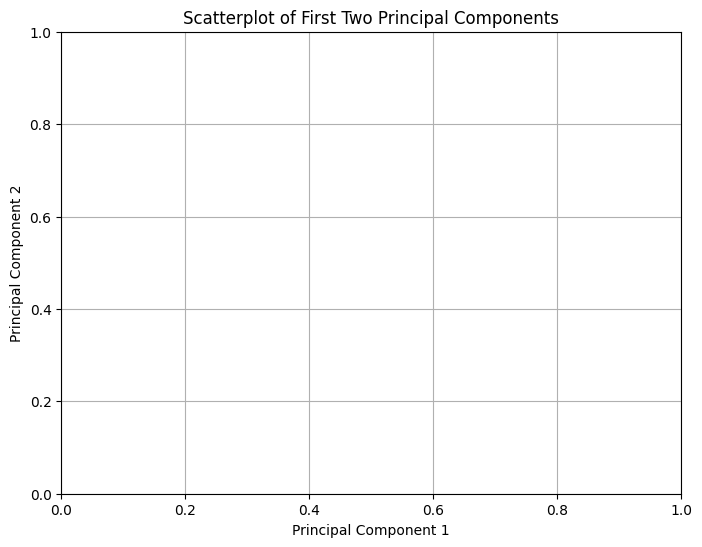

In [15]:
from statsmodels.multivariate.pca import PCA

pc_df = pd.DataFrame(pc.factors, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', s=60, edgecolor='k', color='blue')
plt.title('Scatterplot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Repeat the above exercise, but now include labels in the features you use to fit the PCA. This time,
you can observe label information in the resulting plot.


PCA including label information

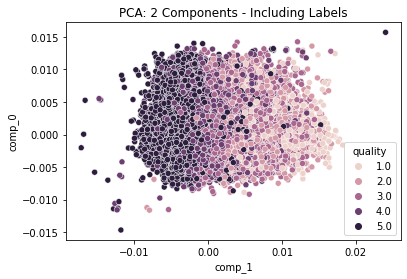

In [ ]:
pc2 = PCA(X, ncomp=2, method='nipals', missing='fill-em')

# Plot here:

# Unsupervised Learning on Clothing Reviews

Next, you will look for structure in the text data.

Adapt the code in the Latent Dirichlet Allocation example in scikit-
learn to work with the text of the clothing reviews: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py. You should have code from assignment module 4 to extract the bag of words features you will need, which you can then pass
to the LDA object.
Modify the code in this example to fit a model with 10 components (topics) to the reviews. Use
the plotting function to visualize the top words in each topic.

In [21]:
# You can use the same part of the assignment 4 "Text Data from Reviews":

import urllib.request
# Download tar.gz file
urllib.request.urlretrieve('https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz', 'aclImdb_v1.tar.gz')


('aclImdb_v1.tar.gz', <http.client.HTTPMessage at 0x7888dd932d50>)

In [23]:
import tarfile
tar = tarfile.open("aclImdb_v1.tar.gz", "r:gz")
file_df = pd.DataFrame([m.name for m in tar.getmembers()], columns=['filename'])
# Paths
train_neg = 'aclImdb/train/neg/'
train_pos = 'aclImdb/train/pos/'
test_neg = 'aclImdb/test/neg/'
test_pos = 'aclImdb/test/pos/'

In [24]:

# This part of code creates train data
# Running this part takes quite some time
files = file_df[file_df['filename'].str.startswith(train_neg)]['filename'].tolist()
neglist = []
for file in files:
  f = tar.extractfile(file)
  if f is not None:
    neglist.append(f.read().decode("utf-8"))
files = file_df[file_df['filename'].str.startswith(train_pos)]['filename'].tolist()
poslist = []
for file in files:
  f = tar.extractfile(file)
  if f is not None:
    poslist.append(f.read().decode("utf-8"))
train_neg_df = pd.DataFrame(list(zip(neglist, np.zeros(len(neglist)))),columns=['text', 'labels'])
train_pos_df = pd.DataFrame(list(zip(poslist, np.ones(len(poslist)))),columns=['text', 'labels'])
training = pd.concat([train_neg_df, train_pos_df], ignore_index=True)

In [25]:
# Use similar strategy to create testing data
# Running this part takes quite some time
files_test = file_df[file_df['filename'].str.startswith(test_neg)]['filename'].tolist()
neglist_test = []
for file in files:
  f = tar.extractfile(file)
  if f is not None:
    neglist_test.append(f.read().decode("utf-8"))
files_test = file_df[file_df['filename'].str.startswith(test_pos)]['filename'].tolist()
poslist_test = []
for file in files_test:
  f = tar.extractfile(file)
  if f is not None:
    poslist.append(f.read().decode("utf-8"))
test_neg_df = pd.DataFrame(list(zip(neglist_test, np.zeros(len(neglist_test)))),columns=['text', 'labels'])
test_pos_df = pd.DataFrame(list(zip(poslist_test, np.ones(len(poslist_test)))),columns=['text', 'labels'])
test = pd.concat([test_neg_df, test_pos_df], ignore_index=True)

CountVectorizer

In [26]:
# Use the same part of the Assignment 4 here:
# Set the feature numbers 1000
vectorizer = TfidfVectorizer(max_features=1000)
spmat = vectorizer.fit_transform(training['text'])
feat_names = vectorizer.get_feature_names_out()
X_review = pd.DataFrame.sparse.from_spmatrix(spmat, columns=feat_names)

In [ ]:
# Review the following link and define "plot_top_words":
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py


<Figure size 432x288 with 0 Axes>

done in 82.776s.


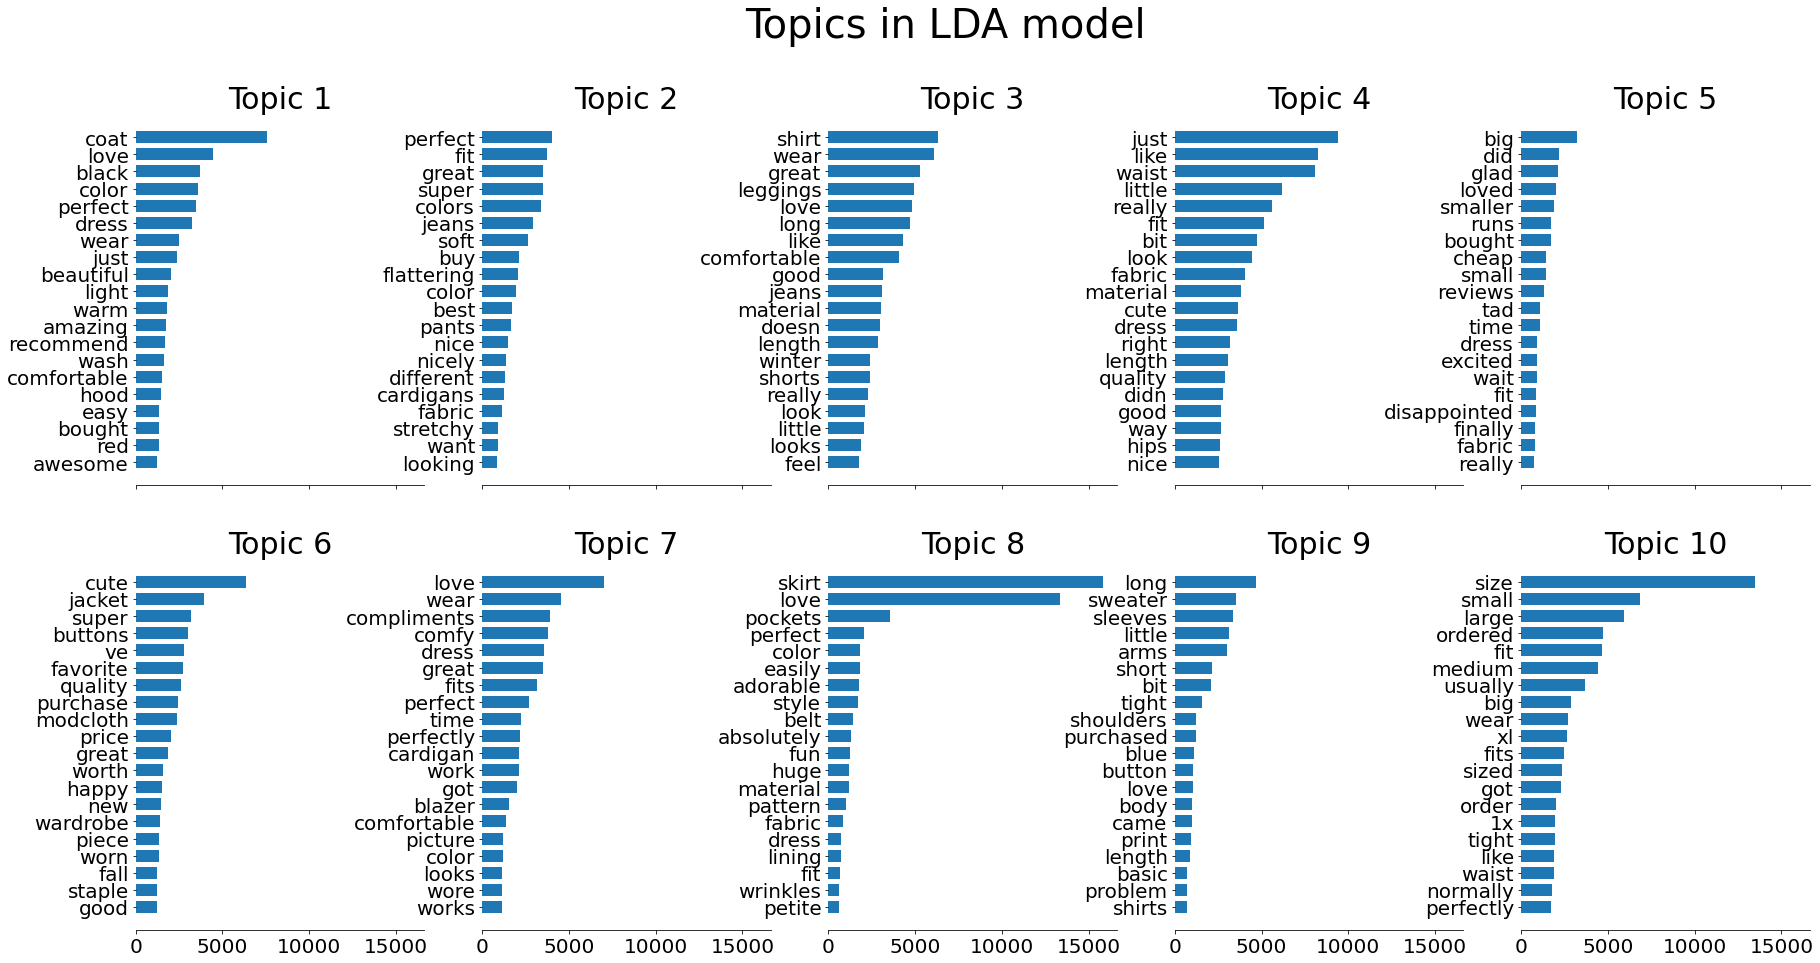

In [ ]:
# Use the same link above for ploting the LDA model:
...





...
plot_top_words(lda, feat_names, 20, 'Topics in LDA model')

# t-SNE and Manifold Learning
Remove the data points with missing data by using:

`no_missing_data = X.dropna()`

You should have 623 remaining data points. Use t-SNE (https://scikit-learn.org/stable/modules/manifold.html#t-sne) to embed the data points in a low dimensional space. Look at the guide at https://distill.pub/2016/misread-tsne/ and vary the parameters, including the perplexity. When you have an embedding that looks good, label it using the columns of X, using seaborn’s scatterplot and hue. For example, the embedding below shows an apparent variation by size. Plot all the categorical and numerical variables.

In [ ]:
no_missing_data = X.dropna()
no_missing_data

,waist,size,hips,bra size,bust,height,shoe size,cup size,category,length,shoe width
1069,30.0,8,40.0,36.0,36.0,67.0,8.5,3.0,2.0,2.0,0.0
1750,27.0,8,34.0,34.0,38.0,59.0,8.0,7.0,2.0,0.0,2.0
1751,33.0,12,36.0,38.0,38.0,63.0,7.5,6.0,2.0,0.0,2.0
2336,49.0,32,51.0,42.0,51.0,66.0,9.5,5.0,2.0,0.0,2.0
2367,31.0,8,41.0,34.0,36.0,66.0,8.5,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
80851,31.0,15,39.0,36.0,39.0,66.0,8.0,6.0,4.0,0.0,2.0
80932,36.0,15,42.0,38.0,44.0,63.0,6.5,4.0,3.0,0.0,2.0
80942,30.0,8,40.0,36.0,35.0,64.0,8.0,3.0,3.0,0.0,2.0
82654,30.0,20,39.0,42.0,32.0,64.0,7.5,2.0,3.0,0.0,2.0


Text(0.5, 1.0, 'shoe width')

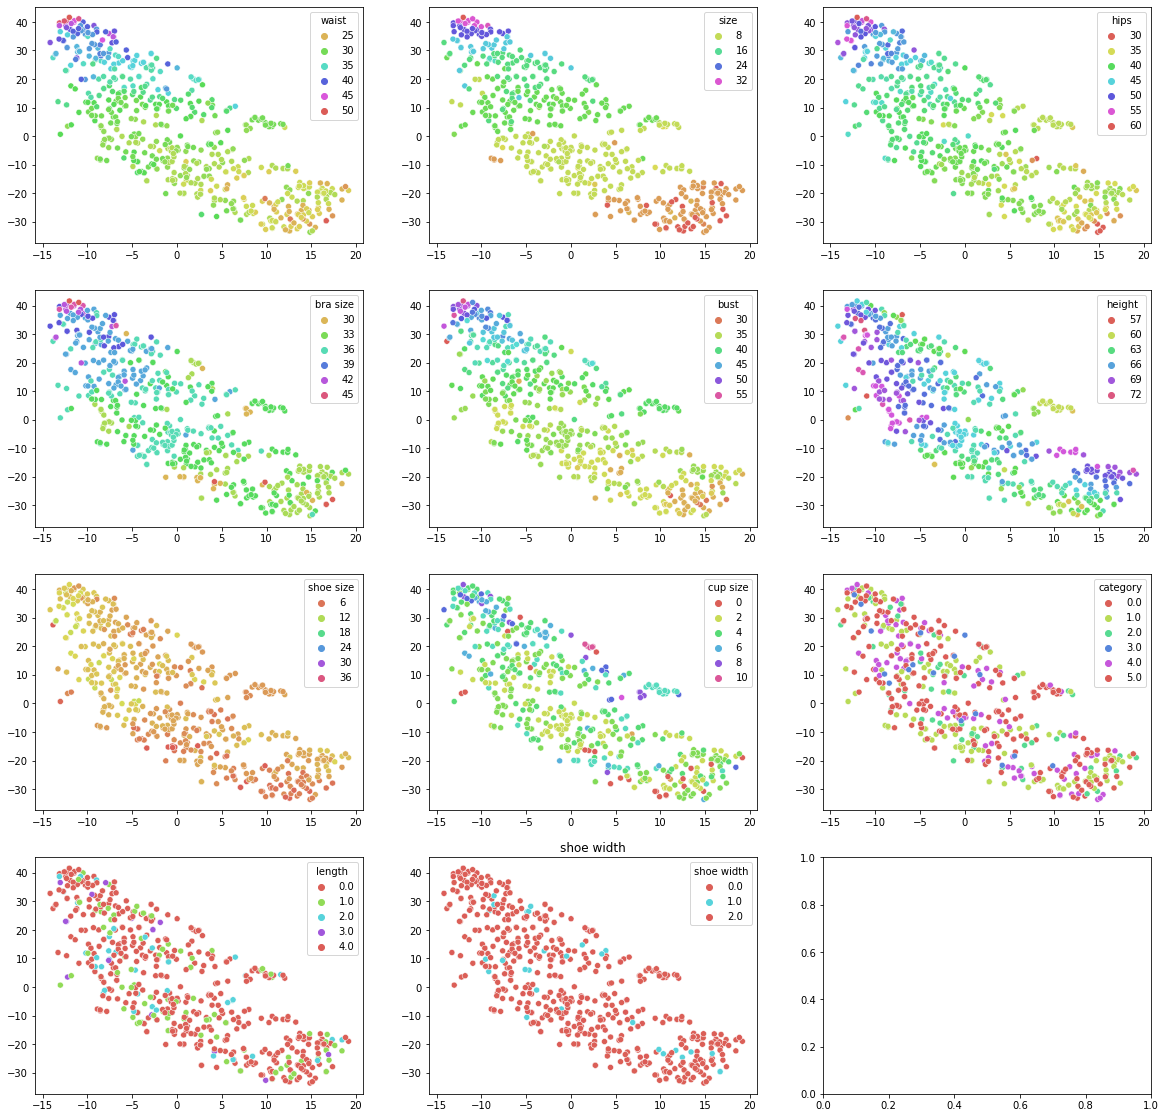

In [ ]:
# Use 2 components, 40 for perplexity, 5000 iteration, 10 for the Learning rate, 2 for number of jobs and 42 for random_state.
# Fit transform the no missing data
tsne = ...
tsne_embd = ...

# Plot here:

Written Questions
(short answer, 2-3 sentences):

●	How many principal components do you think are necessary for the cat faces dataset? Which measurement of the number of features, using the eigenvectors or cross-validation, do you think would be likely to give better results for answering this question? Connect your answer to what you know about supervised learning.




●	Compare the results you obtained from the cat faces to the human faces in the original demo. What could be done to the cat faces dataset to get results that look more like the results using human faces.  




●	In the review data, you plotted the data by label along with the principal components. You also looked at the top topics extracted from the text of the reviews. Which of these two do you think is a more meaningful representation of the data?



●	Which data worked better in the Module 4 Assignment, when you used the clothing data for supervised learning? Does this have any relationship to the unsupervised analysis you have done of these data?



●	Did embedding the data using t-Distributed Stochastic Neighbor Embedding (t-SNE) give any additional information about the review data? Do you see more structure in the data with this nonlinear model than the one using PCA?
